In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns
import numpy as np
import statsmodels.api as s

Prob1: Johnson's Repair and Maintenance

In [2]:
tb1 = pd.read_excel('G:/IIT - nptel/Data Analytics with Python/data/dummy.xlsx')
tb1

,servicecall,months_since_last_service,type_of_repair,repair_time_in_hours
0,1,2,electrical,2.9
1,2,6,mechanical,3.0
2,3,8,electrical,4.8
3,4,3,mechanical,1.8
4,5,2,electrical,2.9
5,6,7,electrical,4.9
6,7,9,mechanical,4.2
7,8,8,mechanical,4.8
8,9,4,electrical,4.4
9,10,6,electrical,4.5


Text(0.5, 1.0, 'Simple Linear Regression')

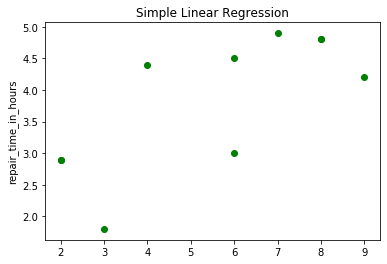

In [3]:
plt.scatter(tb1['months_since_last_service'], tb1['repair_time_in_hours'], color = "green")
plt.ylabel('repair_time_in_hours')
plt.title('Simple Linear Regression')

In [6]:
from statsmodels.formula.api import ols
Reg = ols(formula = "repair_time_in_hours ~ months_since_last_service", data = tb1)
Fit1 = Reg.fit()
print(Fit1.summary())

                             OLS Regression Results                             
Dep. Variable:     repair_time_in_hours   R-squared:                       0.534
Model:                              OLS   Adj. R-squared:                  0.476
Method:                   Least Squares   F-statistic:                     9.174
Date:                  Tue, 17 Mar 2020   Prob (F-statistic):             0.0163
Time:                          13:06:19   Log-Likelihood:                -10.602
No. Observations:                    10   AIC:                             25.20
Df Residuals:                         8   BIC:                             25.81
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
In

C:\Users\suvar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


Normal Prob Plot

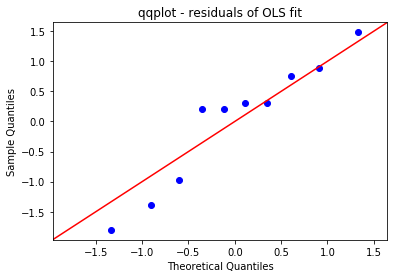

In [7]:
res = Fit1.resid # residuals
probplot = s.ProbPlot(res, stats.norm, fit = True)
fig = probplot.qqplot(line = '45')
h = plt.title('qqplot - residuals of OLS fit')
plt.show()

In [9]:
just_dummies = pd.get_dummies(tb1['type_of_repair'])
just_dummies

,electrical,mechanical
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,1,0
6,0,1
7,0,1
8,1,0
9,1,0


In [12]:
step_1 = pd.concat([tb1, just_dummies], axis= 1)
step_1
step_1.drop(['type_of_repair', 'mechanical'], inplace = True, axis = 1)
step_1

,servicecall,months_since_last_service,repair_time_in_hours,electrical
0,1,2,2.9,1
1,2,6,3.0,0
2,3,8,4.8,1
3,4,3,1.8,0
4,5,2,2.9,1
5,6,7,4.9,1
6,7,9,4.2,0
7,8,8,4.8,0
8,9,4,4.4,1
9,10,6,4.5,1


In [15]:
result = s.OLS(step_1['repair_time_in_hours'], s.add_constant(step_1[['months_since_last_service', 'electrical']])).fit()
print(result.summary())

                             OLS Regression Results                             
Dep. Variable:     repair_time_in_hours   R-squared:                       0.859
Model:                              OLS   Adj. R-squared:                  0.819
Method:                   Least Squares   F-statistic:                     21.36
Date:                  Tue, 17 Mar 2020   Prob (F-statistic):            0.00105
Time:                          14:58:55   Log-Likelihood:                -4.6200
No. Observations:                    10   AIC:                             15.24
Df Residuals:                         7   BIC:                             16.15
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

Prob2: Employee Salary Discrimination check based on gender

In [16]:
tb2 = pd.read_excel('G:/IIT - nptel/Data Analytics with Python/data/dummy2.xlsx')
tb2

,Employee,Salary,Gender,Experience
0,1,7.5,Male,6
1,2,8.6,Male,10
2,3,9.1,Male,12
3,4,10.3,Male,18
4,5,13.0,Male,30
5,6,6.2,Female,5
6,7,8.7,Female,13
7,8,9.4,Female,15
8,9,9.8,Female,21


Text(0.5, 1.0, 'Simple Linear Regression')

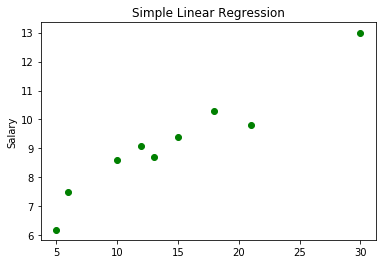

In [18]:
plt.scatter(tb2['Experience'], tb2['Salary'], color = "green")
plt.ylabel('Salary')
plt.title('Simple Linear Regression')

In [23]:
Reg2 = ols(formula = "Salary ~ Experience", data = tb2)
Fit2 = Reg2.fit()
print(Fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     87.61
Date:                Tue, 17 Mar 2020   Prob (F-statistic):           3.30e-05
Time:                        16:44:22   Log-Likelihood:                -6.2491
No. Observations:                   9   AIC:                             16.50
Df Residuals:                       7   BIC:                             16.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8093      0.404     14.386      0.0

C:\Users\suvar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


Residual Analysis

In [25]:
influence = Fit2.get_influence()
resid_student = influence.resid_studentized_external

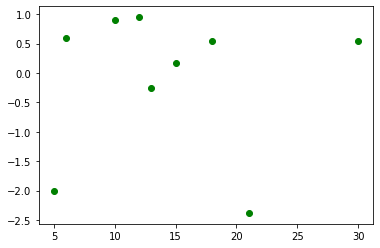

In [26]:
plt.figure()
plt.scatter(tb2['Experience'], resid_student, color = "green")

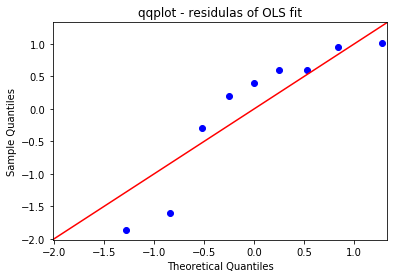

In [27]:
res = Fit2.resid # residuals
probplot = s.ProbPlot(res, stats.norm, fit = True)
fig = probplot.qqplot(line = '45')
h = plt.title('qqplot - residulas of OLS fit')
plt.show()

Multiple Regression Model by introducing dummies

In [29]:
just_dummies2 = pd.get_dummies(tb2['Gender'])
just_dummies2

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,1,0
6,1,0
7,1,0
8,1,0


Using x1 = 1 as Female and x1 = 0: Dropping Males

In [32]:
step_2 = pd.concat([tb2, just_dummies2], axis = 1)
step_2.drop(['Gender', 'Male'], inplace = True, axis = 1)
step_2

,Employee,Salary,Experience,Female
0,1,7.5,6,0
1,2,8.6,10,0
2,3,9.1,12,0
3,4,10.3,18,0
4,5,13.0,30,0
5,6,6.2,5,1
6,7,8.7,13,1
7,8,9.4,15,1
8,9,9.8,21,1


In [36]:
result2 = s.OLS(step_2['Salary'], s.add_constant(step_2[['Female']])).fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.8426
Date:                Tue, 17 Mar 2020   Prob (F-statistic):              0.389
Time:                        18:46:42   Log-Likelihood:                -17.455
No. Observations:                   9   AIC:                             38.91
Df Residuals:                       7   BIC:                             39.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7000      0.853     11.367      0.0

C:\Users\suvar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\suvar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


Including Experience in addition to Female

In [37]:
result2 = s.OLS(step_2['Salary'], s.add_constant(step_2[['Experience', 'Female']])).fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     111.6
Date:                Tue, 17 Mar 2020   Prob (F-statistic):           1.80e-05
Time:                        18:58:05   Log-Likelihood:                -1.5752
No. Observations:                   9   AIC:                             9.150
Df Residuals:                       6   BIC:                             9.742
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2485      0.291     21.439      0.0

Using x1 = 0 as Female and x1 = 1 as Male; Droppong Female

In [38]:
step_3 = pd.concat([tb2, just_dummies2], axis = 1)
step_3.drop(['Gender', 'Female'], inplace = True, axis = 1)
step_3

,Employee,Salary,Experience,Male
0,1,7.5,6,1
1,2,8.6,10,1
2,3,9.1,12,1
3,4,10.3,18,1
4,5,13.0,30,1
5,6,6.2,5,0
6,7,8.7,13,0
7,8,9.4,15,0
8,9,9.8,21,0


In [39]:
result3 = s.OLS(step_3['Salary'], s.add_constant(step_3[['Male']])).fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.8426
Date:                Tue, 17 Mar 2020   Prob (F-statistic):              0.389
Time:                        19:11:46   Log-Likelihood:                -17.455
No. Observations:                   9   AIC:                             38.91
Df Residuals:                       7   BIC:                             39.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5250      0.954      8.935      0.0

C:\Users\suvar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\suvar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))
